## МЕГАФОН - курсовой проект - часть 1
Инструкция к финальному проекту

У нас появился запрос из отдела продаж и маркетинга. Как вы знаете «МегаФон»
предлагает обширный набор различных услуг своим абонентам. При этом разным
пользователям интересны разные услуги. Поэтому необходимо построить
алгоритм, который для каждой пары пользователь-услуга определит вероятность
подключения услуги.
#### Данные
В качестве исходных данных вам будет доступна информация об отклике
абонентов на предложение подключения одной из услуг. Каждому пользователю
может быть сделано несколько предложений в разное время, каждое из которых он
может или принять, или отклонить.
Отдельным набором данных будет являться нормализованный
анонимизированный набор признаков, характеризующий профиль потребления
абонента. Эти данные привязаны к определенному времени, поскольку профиль
абонента может меняться с течением времени.
Данные train и test разбиты по периодам – на train доступно 4 месяцев, а на test
отложен последующий месяц.

Итого, в качестве входных данных будут представлены:
● data_train.csv: id, vas_id, buy_time, target
● features.csv.zip: id, <feature_list>

И тестовый набор:
● data_test.csv: id, vas_id, buy_time
target - целевая переменная, где 1 означает подключение услуги, 0 - абонент
не подключил услугу соответственно.
buy_time - время покупки, представлено в формате timestamp, для работы с
этим столбцом понадобится функция datetime.fromtimestamp из модуля
datetime.
id - идентификатор абонента
vas_id - подключаемая услуга

#### Примечание: 
Размер файла features.csv в распакованном виде весит 20 гб, для
работы с ним можно воспользоваться pandas.read_csv, либо можно воспользоваться
библиотекой Dask.

#### Метрика
Скоринг будет осуществляться функцией f1, невзвешенным образом, как например
делает функция sklearn.metrics.f1_score(…, average=’macro’).

sklearn.metrics.f1_score — scikit-learn 0.22.1 documentation

## Раздел презентации

## Часть №1 - файл PROJECT_MEGAFON_v4

### Задача
Построить алгоритм, который для каждой пары пользователь-услуга определит
вероятность подключения услуги
### Данные
В качестве исходных данных предоставлена информация об отклике абонентов на
предложение подключения одной из услуг ( data_train.csv/data_test.csv).
Каждому пользователю может быть сделано несколько предложений в разное время,
каждое из которых он может или принять, или отклонить.
Отдельным набором данных будет являться нормализованный анонимизированный набор
признаков, характеризующий профиль потребления абонента (features.csv). Эти данные
привязаны к определенному времени, поскольку профиль абонента может меняться с
течением времени.
### Анализ данных
При нализе тренировочных данных выявлено, что больше всего было подключено услуг под номеров 6(42%),4(25%),9(18%).
остальные услуги подключены в менее 2% случаев.
Обнаружены вплески подключения услуг, явно связанных с проводимыми Мегафоном мероприятиями.
Целевая переменная имеет явный дисбаланс классов 0-не подключено (93% данных), 1-подключено(7%)

### Подготовка данных
было проведено:
1. были созданы новые признаки week_on_month,day,month
2. Выполнено объединение тренировочной таблицы и таблицы с признаками по id пользователей и ближайшей дате.
3. Данные из обучающего набора разделены на тренировочную и тестовую выборки.
4. Выполнена балансировка данных (UnderSampling)на тренировочной выборке. т.к. в исходном наборе имеется очень сильный дисбаланс классов.
5. Собран pipline для обучения модели.

### Подбор, выбор и сохранение финальной модели
обучено 11 вариантов моделей (LogisticRegression, XGBoost, Catboost, DecisionTree, GradientBoostingClassifier, LGBM плюс вариации указанных моделей с подобранными threshold, дающего максимальные значения требуемой метрики)  и собрано в таблицу для анализа и принятия решения по финально модели. Для наглядности приведено графическое предстваление результатов работы модели). В процессе работы проведено тестирование каждой модели на указанную в задаче метрику: sklearn.metrics.f1_score(…, average=’macro’).
Финальная модель сохранена на формате pickle. Проведена проверка финальной модели после ее сохранения путем загрузки и повторной прогонки данных. Резульат работы модели сохранен в файл answers_test.csv. В этом файле  находится 4 столбца: buy_time, id, vas_id и target. Величина Target записана как вероятность подключения услуги.

### Принцип составления индивидуальных предложений для абонентов.
При составлении индивидуальных рекомендаций, к предсказаниям модели следует
добавлять ряд бизнес-ограничений.
Например:
- Необходимо перевести данные метрики в бизнес-метрики с использованием денежных измерителей бизнес предложений. С учетом этого подбирать threshold для получения опимального результата.
- Проверить имеется ли уже услуга в списке подключенных услуг абонента.
- Учитывать количество и качество последнего взаимодействия с клиентом.
- Если предположить, что мы знаем более точно содержание каждого признака, то можно составить и протестировать модель с учетом бизнес-логики и возможно более оптимального подбора признаков под конкретное предложение.

## Часть №2 - файл PROJECT_MEGAFON_v4_ML
файл, в котором производится загрузка модели, тестовых данных и датасет с признаками. на выходе получается файл. answers_test.csv. В этом файле находится 4 столбца: buy_time, id, vas_id и target. 

In [ ]:
# начало анализа данных, подбор и утверждение финальной модели.

In [159]:
# библиотеки
import pandas as pd
import numpy as np
import dask.dataframe as dd
from datetime import date
import pickle 

# разделение данных
from sklearn.model_selection import train_test_split

# графики
import seaborn as sns
from scipy.stats import boxcox, probplot
import matplotlib.pyplot as plt
%matplotlib inline

# метрики
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

# Модели
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import catboost as catb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

# балансировка классов
from imblearn.under_sampling import RandomUnderSampler

# пайппланы
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
# укажем путь нахождения данных
FEATURES_PATH = 'f:/3/features.csv'
TRAIN_DF_PATH = 'f:/3/data_train.csv'
users_data_df_PATH = 'f:/3/data_test.csv'
DATA_TRAIN_FEATURES_PATH = 'f:/3/data_train_features.csv'
DATA_TRAIN_FEATURES_PATH_pkl = 'f:/3/data_train_features.pkl'
DATA_TEST_FEATURES_PATH = 'f:/3/data_test_features.csv'
DATA_TEST_FEATURES_PATH_pkl = 'f:/3/data_test_features.pkl'

In [21]:
# загрузим тренировочный датасет
train_df = pd.read_csv(TRAIN_DF_PATH)
train_df = train_df.drop('Unnamed: 0', axis=1)

In [3]:
# загрузм признаки
features_ddf = dd.read_csv(FEATURES_PATH, sep="\t")
features_ddf = features_ddf.drop('Unnamed: 0', axis=1)

In [4]:
features_ddf.head(5)

,id,buy_time,0,1,2,3,4,5,6,7,...,243,244,245,246,247,248,249,250,251,252
0,2013026,1531688400,18.910029,46.980888,4.969214,-1.386798,3.791754,-14.01179,-16.08618,-65.076097,...,-977.373846,-613.770792,-25.996269,-37.630448,-301.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,2014722,1539550800,36.690029,152.400888,448.069214,563.833202,463.841754,568.99821,-16.08618,-53.216097,...,-891.373846,-544.770792,-20.996269,48.369552,80.252276,-13.832889,-0.694428,-1.175933,-0.45614,0.0
2,2015199,1545598800,-67.019971,157.050888,-63.180786,178.103202,-68.598246,156.99821,3.51382,25.183903,...,-977.373846,-613.770792,-12.996269,-37.630448,10829.252276,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,2021765,1534107600,7.010029,150.200888,-6.930786,216.213202,76.621754,351.84821,-16.08618,-65.076097,...,-973.373846,-613.770792,-23.996269,-37.630448,-205.747724,-24.832889,-0.694428,-11.175933,-0.45614,1.0
4,2027465,1533502800,-90.439971,134.220888,-104.380786,153.643202,-109.798246,132.53821,-16.08618,-65.076097,...,1643.626154,2007.229208,206.003731,-21.630448,6667.252276,92.167111,-0.694428,49.824067,47.54386,0.0


In [6]:
train_df.describe()

,id,vas_id,buy_time,target
count,8.316530e+05,831653.000000,8.316530e+05,831653.000000
mean,2.158304e+06,2.686185,1.538937e+09,0.072369
std,1.257907e+06,1.952034,5.019053e+06,0.259098
min,2.000000e+00,1.000000,1.531084e+09,0.000000
25%,1.067319e+06,1.000000,1.534108e+09,0.000000
50%,2.144574e+06,2.000000,1.538341e+09,0.000000
75%,3.244254e+06,4.000000,1.544389e+09,0.000000
max,4.362694e+06,9.000000,1.546204e+09,1.000000


In [7]:
train_df.shape

(831653, 4)

In [22]:
X = train_df.drop('target', axis=1)
y = train_df['target']

0.0    0.927631
1.0    0.072369
Name: target, dtype: float64

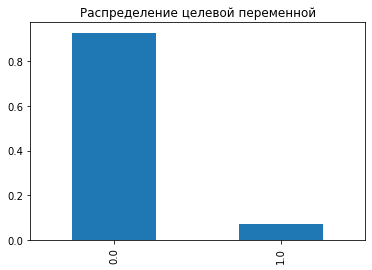

In [9]:
# проверим целевую переменную на дисбаланс классов
(y.value_counts()/y.shape[0]).plot(kind='bar', title='Распределение целевой переменной');
y.value_counts()/y.shape

#### присутствует дисбаланс классов. в зависимости от модели, в дальнейшем примем решение о балансировке данных

Определение типа признаков в датасете

In [3]:
def features_database(X):
    print("ID уникален? ", X.index.is_unique)
    print("Есть ли дубли в строках?", X.duplicated().sum())
    print("Сколько процент признаков могут принимать null-значениями? %d%%" % float((X.isnull().sum() > 0).sum()/X.shape[1]*100))
    print()    
    X_nunique = X.apply(lambda x: x.nunique(dropna=False))
    f_all = set(X_nunique.index.tolist())
    #константные признаки
    f_const = set(X_nunique[X_nunique == 1].index.tolist())
    #вещественные признаки
    f_numeric = (X.fillna(0).astype(int).sum() - X.fillna(0).sum()).abs()
    f_numeric = set(f_numeric[f_numeric > 0].index.tolist())
    f_other = f_all - (f_numeric | f_const)
    #бинарные
    f_binary = set(X.loc[:, f_other].columns[(
                          (X.loc[:, f_other].max() == 1) & \
                          (X.loc[:, f_other].min() == 0) & \
                          (X.loc[:, f_other].isnull().sum() == 0))])
    #категориальные
    f_categorical = set(X_nunique.loc[f_other][X_nunique.loc[f_other] <= 10].index.tolist())
    f_numeric_extra = f_categorical
    f_other = f_other - f_categorical
    f_numeric = f_numeric | f_other
    f_other = f_other - f_numeric

    #assert(X_nunique.shape[0] == len(f_const) + len(f_binary) + len(f_numeric) + len(f_categorical))

    print('f_all:', X.shape[1])    
    print('f_const:', len(f_const))
    print('f_binary:', len(f_binary))
    print('f_categorical:', len(f_categorical))
    print('f_numeric:', len(f_numeric))

    f_ok = list(f_binary | f_categorical | f_numeric)
    f_binary, f_categorical, f_numeric = list(f_binary), list(f_categorical), list(f_numeric)
    return f_ok, f_binary, f_categorical, f_numeric

In [11]:
features_database(X)

ID уникален?  True
Есть ли дубли в строках? 0
Сколько процент признаков могут принимать null-значениями? 0%

f_all: 3
f_const: 0
f_binary: 0
f_categorical: 1
f_numeric: 2


(['vas_id', 'id', 'buy_time'], [], ['vas_id'], ['id', 'buy_time'])

In [23]:
train_df.head(5)

,id,vas_id,buy_time,target
0,540968,8.0,1537131600,0.0
1,1454121,4.0,1531688400,0.0
2,2458816,1.0,1534107600,0.0
3,3535012,5.0,1535922000,0.0
4,1693214,1.0,1535922000,0.0


In [25]:
train_df['date'] =  train_df['buy_time'].apply(lambda x: date.fromtimestamp(x))
print(f"min: {train_df['date'].min()} и max: {train_df['date'].max()}")

min: 2018-07-09 и max: 2018-12-31


In [26]:
train_df.head(5)

,id,vas_id,buy_time,target,date
0,540968,8.0,1537131600,0.0,2018-09-17
1,1454121,4.0,1531688400,0.0,2018-07-16
2,2458816,1.0,1534107600,0.0,2018-08-13
3,3535012,5.0,1535922000,0.0,2018-09-03
4,1693214,1.0,1535922000,0.0,2018-09-03


In [27]:
#какое каличество каждой услуги было предложено и было ли согласие по target
vas_id_to_counts = {
        'vas_id': train_df['vas_id'].value_counts(),
        '0': train_df.loc[(train_df['target']==0, 'vas_id') ].value_counts(),
        '1': train_df.loc[(train_df['target']==1, 'vas_id') ].value_counts()
}
df_vas_id_to_counts = pd.DataFrame(vas_id_to_counts)
df_vas_id_to_counts['percent_number_1'] =  df_vas_id_to_counts['1']/df_vas_id_to_counts['vas_id']*100
df_vas_id_to_counts

,vas_id,0,1,percent_number_1
1.0,310175,304511,5664,1.826066
2.0,249505,244708,4797,1.922607
4.0,85756,63991,21765,25.380148
5.0,94085,92393,1692,1.798374
6.0,57878,33174,24704,42.682885
7.0,15432,15219,213,1.380249
8.0,13350,13003,347,2.599251
9.0,5472,4468,1004,18.347953


из таблицы видно, что больше всего было принято предложений услуг за номером 6, 4, 9. Остальные услуги в районе 2%

In [28]:
# проаналиируем услуги, которые были предложены на неделе, на конкретном дне и месяце 
# сформируем эти дополнительные признаки

In [29]:
train_df['date'] = pd.to_datetime(train_df['date'], errors ="coerce")
train_df.astype("int64").dtypes
train_df['week_on_month'] = train_df['date'].dt.week
train_df['day'] = train_df['date'].dt.day
train_df['month'] = train_df['date'].dt.month
train_df.head(5)

,id,vas_id,buy_time,target,date,week_on_month,day,month
0,540968,8.0,1537131600,0.0,2018-09-17,38,17,9
1,1454121,4.0,1531688400,0.0,2018-07-16,29,16,7
2,2458816,1.0,1534107600,0.0,2018-08-13,33,13,8
3,3535012,5.0,1535922000,0.0,2018-09-03,36,3,9
4,1693214,1.0,1535922000,0.0,2018-09-03,36,3,9


In [30]:
def plt_bar_groupby_target(x,column_bar,txt):
    dff1 = x[x.target == 1].groupby(column_bar).count()[['target']]
    dff1.rename(columns={"target": "target_1"}, inplace = True)    
    dff0 = x[x.target == 0].groupby(column_bar).count()[['target']]
    dff0.rename(columns={"target": "target_0"}, inplace = True)
    result = pd.concat([dff1, dff0], axis = 1, join="inner")
    result.plot(kind = "bar",
                title = txt,
               figsize = (12,8))

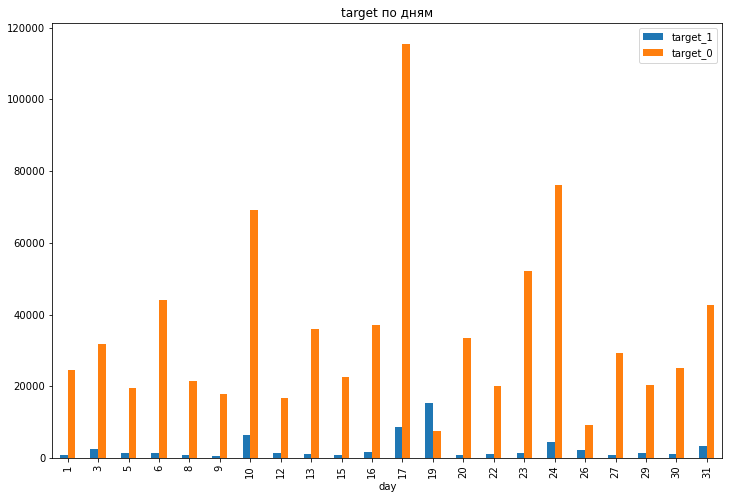

In [19]:
plt_bar_groupby_target(train_df, 'day', 'target по дням')

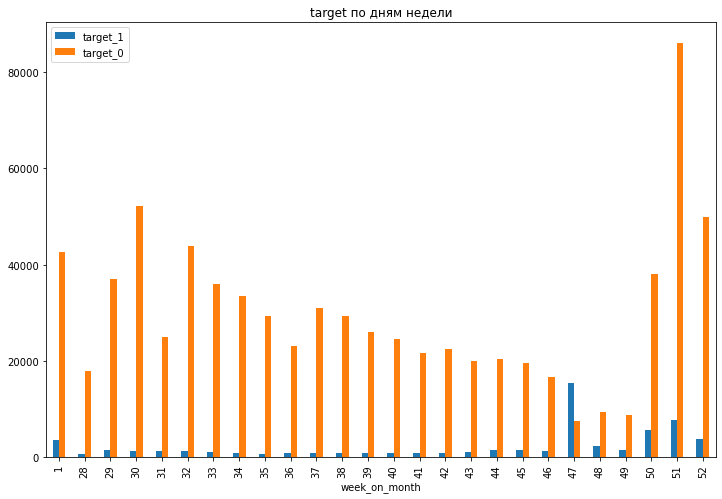

In [20]:
plt_bar_groupby_target(train_df, 'week_on_month', 'target по дням недели')

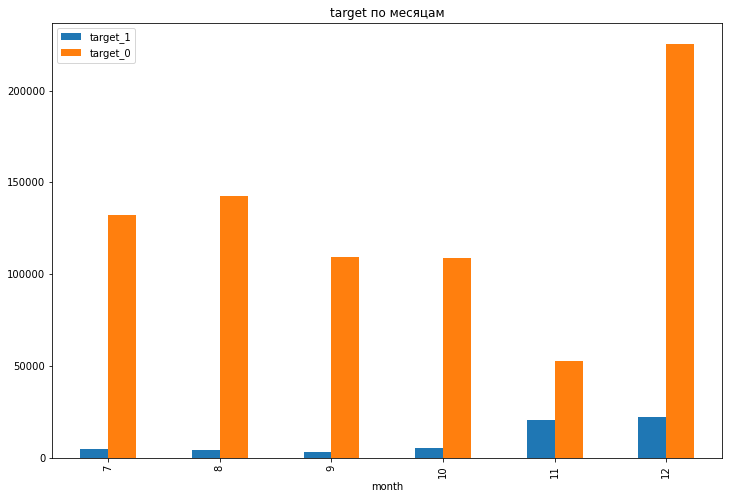

In [21]:
plt_bar_groupby_target(train_df, 'month', 'target по месяцам')

In [22]:
features_ddf.head(5)

,id,buy_time,0,1,2,3,4,5,6,7,...,243,244,245,246,247,248,249,250,251,252
0,2013026,1531688400,18.910029,46.980888,4.969214,-1.386798,3.791754,-14.01179,-16.08618,-65.076097,...,-977.373846,-613.770792,-25.996269,-37.630448,-301.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,2014722,1539550800,36.690029,152.400888,448.069214,563.833202,463.841754,568.99821,-16.08618,-53.216097,...,-891.373846,-544.770792,-20.996269,48.369552,80.252276,-13.832889,-0.694428,-1.175933,-0.45614,0.0
2,2015199,1545598800,-67.019971,157.050888,-63.180786,178.103202,-68.598246,156.99821,3.51382,25.183903,...,-977.373846,-613.770792,-12.996269,-37.630448,10829.252276,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,2021765,1534107600,7.010029,150.200888,-6.930786,216.213202,76.621754,351.84821,-16.08618,-65.076097,...,-973.373846,-613.770792,-23.996269,-37.630448,-205.747724,-24.832889,-0.694428,-11.175933,-0.45614,1.0
4,2027465,1533502800,-90.439971,134.220888,-104.380786,153.643202,-109.798246,132.53821,-16.08618,-65.076097,...,1643.626154,2007.229208,206.003731,-21.630448,6667.252276,92.167111,-0.694428,49.824067,47.54386,0.0


In [6]:
s = features_ddf.compute()

In [7]:
# сортировка данных перед объединением тренировочного датасета и датасета с признаками
s = s.sort_values(by = ['id','buy_time'], ascending = [True,True])

In [31]:
train_df = train_df.sort_values(by = ['id','buy_time'], ascending = [True,True])

In [32]:
# объединение
%%time
result2 = pd.merge_asof(train_df , s, on="id", by="buy_time", direction="nearest")

Wall time: 2min 3s


In [33]:
result2.head(5)

,id,vas_id,buy_time,target,date,week_on_month,day,month,0,1,...,243,244,245,246,247,248,249,250,251,252
0,2,2.0,1545598800,0.0,2018-12-24,52,24,12,-96.799971,229.530888,...,2300.626154,1492.229208,-21.996269,-35.630448,368.252276,11.167111,7.305572,-12.175933,-0.45614,0.0
1,4,1.0,1533502800,0.0,2018-08-06,32,6,8,-52.309971,-225.139112,...,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,15,1.0,1534107600,0.0,2018-08-13,33,13,8,49.150029,10.390888,...,-950.373846,-593.770792,-24.996269,-37.630448,81.252276,-4.832889,-0.694428,8.824067,-0.45614,1.0
3,16,2.0,1540760400,0.0,2018-10-29,44,29,10,42.570029,138.740888,...,1394.626154,1272.229208,-22.996269,-36.630448,-6.747724,-23.832889,-0.694428,-12.175933,-0.45614,0.0
4,29,1.0,1533502800,0.0,2018-08-06,32,6,8,-52.309971,-225.139112,...,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


In [34]:
result2.shape

(831653, 261)

In [36]:
#удалим строки с пропусками
result_train = result2[result2.vas_id.notnull()]

In [37]:
result_train.shape

(831653, 261)

In [36]:
#сохраним полученный тренировочный датасет в файл
result_train.to_csv(DATA_TRAIN_FEATURES_PATH)

In [38]:
result_train.to_pickle(DATA_TRAIN_FEATURES_PATH_pkl)

In [8]:
#проведем аналогичные манипуляции с тестовым датасетом
test_df = pd.read_csv(users_data_df_PATH)
test_df = test_df.drop('Unnamed: 0', axis=1)

In [9]:
test_df.head(5)

,id,vas_id,buy_time
0,3130519,2.0,1548018000
1,2000860,4.0,1548018000
2,1099444,2.0,1546808400
3,1343255,5.0,1547413200
4,1277040,2.0,1546808400


In [10]:
test_df['date'] = pd.to_datetime(test_df['buy_time'], errors ="coerce")
test_df.astype("int64").dtypes
test_df['week_on_month'] = test_df['date'].dt.week
test_df['day'] = test_df['date'].dt.day
test_df['month'] = test_df['date'].dt.month
test_df.head(5)

,id,vas_id,buy_time,date,week_on_month,day,month
0,3130519,2.0,1548018000,1970-01-01 00:00:01.548018000,1,1,1
1,2000860,4.0,1548018000,1970-01-01 00:00:01.548018000,1,1,1
2,1099444,2.0,1546808400,1970-01-01 00:00:01.546808400,1,1,1
3,1343255,5.0,1547413200,1970-01-01 00:00:01.547413200,1,1,1
4,1277040,2.0,1546808400,1970-01-01 00:00:01.546808400,1,1,1


In [11]:
test_df=test_df.sort_values(by = ['id','buy_time'], ascending=[True,True])

In [12]:
result2 = pd.merge_asof(test_df , s, on="id", by="buy_time", direction="nearest")

In [13]:
result_test = result2[result2.vas_id.notnull()]

In [14]:
result_test.head(5)

,id,vas_id,buy_time,date,week_on_month,day,month,0,1,2,...,243,244,245,246,247,248,249,250,251,252
0,55,2.0,1547413200,1970-01-01 00:00:01.547413200,1,1,1,-96.799971,-166.599112,-110.740786,...,-970.373846,-610.770792,-24.996269,-34.630448,-253.747724,-22.832889,-0.694428,-12.175933,-0.45614,1.0
1,64,4.0,1548018000,1970-01-01 00:00:01.548018000,1,1,1,-96.799971,-407.009112,-110.740786,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,151,2.0,1547413200,1970-01-01 00:00:01.547413200,1,1,1,-20.989971,-147.029112,-34.930786,...,-940.373846,-605.770792,-13.996269,-37.630448,-158.747724,109.167111,-0.694428,-12.175933,-0.45614,0.0
3,274,2.0,1547413200,1970-01-01 00:00:01.547413200,1,1,1,-20.989971,-116.859112,-34.930786,...,-923.373846,-613.770792,-24.996269,-24.630448,-213.747724,-21.832889,-0.694428,-12.175933,-0.45614,0.0
4,274,4.0,1548018000,1970-01-01 00:00:01.548018000,1,1,1,265.700029,-43.599112,251.759214,...,-895.373846,-534.770792,-24.996269,-37.630448,-96.747724,-24.832889,-0.694428,-12.175933,0.54386,0.0


In [15]:
# сохранение объединенного и обработанного датасета
result_test.to_csv(DATA_TEST_FEATURES_PATH)

In [17]:
result_test.to_pickle(DATA_TEST_FEATURES_PATH_pkl)

## выбор оптимальной модели

In [30]:
# загрузим датасет для анализа и подбора модели
train_df = pd.read_pickle(DATA_TRAIN_FEATURES_PATH_pkl)
test_df = pd.read_pickle(DATA_TEST_FEATURES_PATH_pkl)

In [31]:
# уберем признаки, связанные с датой и временем, и с id
train_df = train_df.drop(['id','date','buy_time'], axis=1)

In [32]:
features_database(train_df)

ID уникален?  True
Есть ли дубли в строках? 49873
Сколько процент признаков могут принимать null-значениями? 0%

f_all: 258
f_const: 5
f_binary: 1
f_categorical: 3
f_numeric: 250


(['173',
  '131',
  '29',
  '38',
  '40',
  '82',
  '57',
  '25',
  '109',
  '245',
  '120',
  '162',
  '209',
  '158',
  '159',
  '166',
  '134',
  '48',
  '130',
  '133',
  '161',
  '3',
  '21',
  '15',
  '104',
  '94',
  '76',
  '127',
  '88',
  '128',
  '105',
  '216',
  '54',
  'day',
  '63',
  '70',
  '47',
  '213',
  '2',
  '156',
  '165',
  '195',
  '243',
  '152',
  '13',
  '67',
  '225',
  '8',
  '103',
  '155',
  '206',
  '150',
  '26',
  '31',
  '234',
  '7',
  '64',
  '252',
  '101',
  '51',
  '5',
  '122',
  '227',
  '61',
  '117',
  '180',
  '35',
  '221',
  '112',
  '196',
  '39',
  '46',
  '175',
  '90',
  '86',
  '153',
  '97',
  '168',
  '208',
  '212',
  'target',
  '124',
  '236',
  '72',
  '184',
  '36',
  '77',
  '204',
  '249',
  '160',
  '62',
  '220',
  '87',
  '179',
  'week_on_month',
  '52',
  '146',
  '242',
  '182',
  '201',
  '132',
  '111',
  '145',
  '183',
  '58',
  '114',
  '177',
  '32',
  '200',
  '207',
  '232',
  '1',
  '189',
  '116',
  '93',
  

In [33]:
test_df = test_df.drop(['id','date','buy_time'], axis=1)

In [34]:
features_database(test_df)

ID уникален?  True
Есть ли дубли в строках? 5278
Сколько процент признаков могут принимать null-значениями? 0%

f_all: 257
f_const: 14
f_binary: 0
f_categorical: 2
f_numeric: 247


(['173',
  '131',
  '29',
  '38',
  '40',
  '82',
  '57',
  '25',
  '109',
  '245',
  '120',
  '162',
  '209',
  '158',
  '159',
  '166',
  '134',
  '48',
  '130',
  '133',
  '161',
  '3',
  '21',
  '15',
  '104',
  '94',
  '76',
  '127',
  '88',
  '128',
  '105',
  '216',
  '54',
  '63',
  '70',
  '47',
  '213',
  '2',
  '156',
  '165',
  '195',
  '243',
  '152',
  '13',
  '67',
  '225',
  '8',
  '103',
  '155',
  '206',
  '150',
  '26',
  '31',
  '234',
  '7',
  '64',
  '252',
  '101',
  '51',
  '5',
  '122',
  '227',
  '61',
  '117',
  '180',
  '35',
  '221',
  '112',
  '196',
  '39',
  '46',
  '175',
  '90',
  '86',
  '153',
  '97',
  '168',
  '208',
  '212',
  '124',
  '236',
  '72',
  '184',
  '36',
  '77',
  '204',
  '249',
  '160',
  '62',
  '220',
  '87',
  '179',
  '52',
  '146',
  '242',
  '182',
  '201',
  '132',
  '111',
  '145',
  '183',
  '58',
  '114',
  '177',
  '32',
  '200',
  '207',
  '232',
  '1',
  '189',
  '116',
  '93',
  '224',
  '235',
  '163',
  '214',
  '10'

In [35]:
train_df.head(5)

,vas_id,target,week_on_month,day,month,0,1,2,3,4,...,243,244,245,246,247,248,249,250,251,252
0,2.0,0.0,52,24,12,-96.799971,229.530888,-110.740786,305.723202,-116.158246,...,2300.626154,1492.229208,-21.996269,-35.630448,368.252276,11.167111,7.305572,-12.175933,-0.45614,0.0
1,1.0,0.0,32,6,8,-52.309971,-225.139112,-66.250786,-258.246798,-71.668246,...,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,1.0,0.0,33,13,8,49.150029,10.390888,63.159214,11.993202,57.741754,...,-950.373846,-593.770792,-24.996269,-37.630448,81.252276,-4.832889,-0.694428,8.824067,-0.45614,1.0
3,2.0,0.0,44,29,10,42.570029,138.740888,28.629214,86.133202,23.211754,...,1394.626154,1272.229208,-22.996269,-36.630448,-6.747724,-23.832889,-0.694428,-12.175933,-0.45614,0.0
4,1.0,0.0,32,6,8,-52.309971,-225.139112,-66.250786,-258.246798,-71.668246,...,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


In [36]:
test_df.head(5)

,vas_id,week_on_month,day,month,0,1,2,3,4,5,...,243,244,245,246,247,248,249,250,251,252
0,2.0,1,1,1,-96.799971,-166.599112,-110.740786,-219.206798,-116.158246,-240.31179,...,-970.373846,-610.770792,-24.996269,-34.630448,-253.747724,-22.832889,-0.694428,-12.175933,-0.45614,1.0
1,4.0,1,1,1,-96.799971,-407.009112,-110.740786,-459.616798,-116.158246,-480.72179,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,2.0,1,1,1,-20.989971,-147.029112,-34.930786,-199.636798,-40.348246,-220.74179,...,-940.373846,-605.770792,-13.996269,-37.630448,-158.747724,109.167111,-0.694428,-12.175933,-0.45614,0.0
3,2.0,1,1,1,-20.989971,-116.859112,-34.930786,-169.466798,-40.348246,-190.57179,...,-923.373846,-613.770792,-24.996269,-24.630448,-213.747724,-21.832889,-0.694428,-12.175933,-0.45614,0.0
4,4.0,1,1,1,265.700029,-43.599112,251.759214,-83.706798,246.341754,-104.81179,...,-895.373846,-534.770792,-24.996269,-37.630448,-96.747724,-24.832889,-0.694428,-12.175933,0.54386,0.0


In [37]:
# Разделим в тренировочном сете признаки и целевую переменную
df = train_df.copy()

X = df.drop('target', axis=1)
y = df['target']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

0.0    0.927631
1.0    0.072369
Name: target, dtype: float64

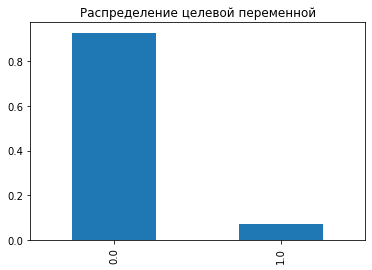

In [39]:
#4. Балансировка массивов.
(y.value_counts()/y.shape[0]).plot(kind='bar', title='Распределение целевой переменной');
y.value_counts()/y.shape

In [40]:
print(X_train.shape)
print(y_train.shape)

(582157, 257)
(582157,)


In [41]:
# проведем балансировку классов
RANDOM_STATE = 42
ros = RandomUnderSampler(random_state=RANDOM_STATE)
X_train, y_train = ros.fit_resample(X_train, y_train)

print("Train")
print(y_train.value_counts()/y_train.shape[0])
print()
print("Test")
print(y_test.value_counts()/y_test.shape[0])

Train
1.0    0.5
0.0    0.5
Name: target, dtype: float64

Test
0.0    0.92763
1.0    0.07237
Name: target, dtype: float64


disbalance = int(y_train.value_counts()[0]) / int(y_train.value_counts()[1])
disbalance

In [42]:
print(X_train.shape)
print(y_train.shape)

(84260, 257)
(84260,)


In [43]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("DataFrame не содердит следующие колонки: %s" % cols_error)
            
class NumberSelector(BaseEstimator, TransformerMixin):    
    def __init__(self, key):
        self.key = key        

    def fit(self, X, y=None):        
        return self

    def transform(self, X):        
        return X[[self.key]]

In [44]:
f_ok, f_binary, f_categorical, f_numeric = features_database(X_train)

ID уникален?  True
Есть ли дубли в строках? 700
Сколько процент признаков могут принимать null-значениями? 0%

f_all: 257
f_const: 7
f_binary: 0
f_categorical: 3
f_numeric: 249


In [45]:
#возмем в датесете только отобранные признаки
X_train = X_train[f_ok]

In [46]:
X_test = X_test[f_ok]

In [47]:
print(X_train.shape)
print(y_train.shape)

(84260, 252)
(84260,)


In [48]:
f_prep_pipeline = make_pipeline(    
    ColumnSelector(columns=f_ok),
    FeatureUnion(transformer_list=[
        ("numeric_features", make_pipeline(
            ColumnSelector(f_numeric),
            SimpleImputer(strategy="median"), # Заполнение пропусков.
            StandardScaler()
        )),
        ("categorical_features", make_pipeline(
            ColumnSelector(f_categorical),
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown='ignore')
        )),
        ("boolean_features", make_pipeline(
            ColumnSelector(f_binary),
        ))
    ])
)

In [49]:
f_prep_pipeline.steps

[('columnselector',
  ColumnSelector(columns=['173', '131', '29', '38', '40', '82', '57', '25', '109',
                          '245', '120', '162', '209', '158', '159', '166', '134',
                          '48', '130', '133', '161', '3', '21', '15', '104', '94',
                          '76', '127', '88', '128', ...])),
 ('featureunion',
  FeatureUnion(transformer_list=[('numeric_features',
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(columns=['173',
                                                                           '131',
                                                                           '29',
                                                                           '38',
                                                                           '40',
                                                                           '82',
                                           

In [50]:
f_prep_pipeline_no_StandardScaler = make_pipeline(    
    ColumnSelector(columns=f_ok),
    FeatureUnion(transformer_list=[
        ("numeric_features", make_pipeline(
            ColumnSelector(f_numeric),
            SimpleImputer(strategy="median")#, # Заполнение пропусков.
            #StandardScaler()
        )),
        ("categorical_features", make_pipeline(
            ColumnSelector(f_categorical),
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown='ignore')
        )),
        ("boolean_features", make_pipeline(
            ColumnSelector(f_binary),
        ))
    ])
)

In [51]:
X_test.shape

(249496, 252)

In [52]:
f_prep_pipeline.fit(X_train)

n_features = f_prep_pipeline.transform(X_test)
n_features

<249496x272 sparse matrix of type '<class 'numpy.float64'>'
	with 62872981 stored elements in Compressed Sparse Row format>

In [53]:
X_train.shape

(84260, 252)

In [54]:
y_train.shape

(84260,)

**********************************************************

In [55]:
def metric(preds_, y_test, txt, find_thresholds, best_thresholds): 
    metrics = {}    
    b = 1    
    precision, recall, thresholds = precision_recall_curve(y_test.values, preds_)    
    metrics['Model'] = txt    
    
    if find_thresholds == False:
        fscore = (1 + b**2) * (precision * recall) / (b**2 * precision + recall)            
        ix = np.argmax(fscore)    
        cnf_matrix = confusion_matrix(y_test, preds_ > thresholds[ix])
        metrics['Best Threshold'] = thresholds[ix]
        metrics['F-Score'] = fscore[ix]    
        metrics['Precision'] = precision[ix]
        metrics['Recall'] = recall[ix]        
    else:
        cnf_matrix = confusion_matrix(y_test, preds_ > best_thresholds)
        metrics['Best Threshold'] = best_thresholds               
        
    metrics['TN'] = TN = cnf_matrix[0][0]
    metrics['FN'] = FN = cnf_matrix[1][0]
    metrics['TP'] = TP = cnf_matrix[1][1]
    metrics['FP'] = FP = cnf_matrix[0][1]
    
    if find_thresholds == True:
        metrics['Precision'] = PrecisionTrue = TP/(TP+FP)
        metrics['Recall'] = RecallTrue = TP/(TP+FN)
        metrics['F-Score'] = (1 + b**2) * (PrecisionTrue * RecallTrue) / (b**2 * PrecisionTrue + RecallTrue)        
        
    metrics['roc_auc_score_test'] = roc_auc_score(y_test, preds_) 
    metrics['accuracy'] = (TP + TN)/(FP + FN + TP + TN)
    metrics['macro_avg_pr'] = (TN/(FN + TN) + TP/(FP + TP))/2 # берем среднее от precision по обоим классам
  
   
    return metrics

In [56]:
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix, \
                             accuracy_score, classification_report, plot_confusion_matrix, \
                             plot_precision_recall_curve, precision_recall_curve, recall_score,
                             plot_roc_curve,precision_recall_fscore_support)

def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred, name_model):
    metrics={}
    b=1
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))
    TN, FP, FN, TP = confusion_matrix(y_test_true, y_test_pred).ravel()    
    metrics['Model'] = name_model
    metrics['TN'] = TN
    metrics['FN'] = FN
    metrics['TP'] = TP
    metrics['FP'] = FP
    metrics['F-Score-macro'] = precision_recall_fscore_support(y_test_true, y_test_pred, average='macro')[2]
    metrics['Precision'] = PrecisionTrue = TP/(TP+FP)
    metrics['Recall'] = RecallTrue = TP/(TP+FN)
    metrics['F-Score'] = (1 + b**2) * (PrecisionTrue * RecallTrue) / (b**2 * PrecisionTrue + RecallTrue)
    metrics['roc_auc_score_test'] = roc_auc_score(y_test_true, y_test_pred) 
    metrics['accuracy'] = (TP + TN)/(FP + FN + TP + TN)
    return metrics

In [57]:
def evaluate_preds(model, X_train, X_test, y_train, y_test, name_model,threshold=None):
    if threshold==None:
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    else:
        y_train_pred = model.predict_proba(X_train)[:, 1]
        y_train_pred=(y_train_pred >= threshold).astype(int)
        y_test_pred = model.predict_proba(X_test)[:, 1]
        y_test_pred = (y_test_pred >= threshold).astype(int)

    return get_classification_report(y_train, y_train_pred, y_test, y_test_pred, name_model)

## ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

In [58]:
pipeline_log_reg = make_pipeline(
    f_prep_pipeline,
    LogisticRegression(random_state=42, n_jobs=-1, max_iter=200)
)
pipeline_log_reg.fit(X_train, y_train)


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columnselector',
                                  ColumnSelector(columns=['173', '131', '29',
                                                          '38', '40', '82',
                                                          '57', '25', '109',
                                                          '245', '120', '162',
                                                          '209', '158', '159',
                                                          '166', '134', '48',
                                                          '130', '133', '161',
                                                          '3', '21', '15',
                                                          '104', '94', '76',
                                                          '127', '88', '128', ...])),
                                 ('featureunion',
                                  FeatureUnion(transformer_list=[('numeric_features',

In [59]:
metrics_all_ = []
metrics_all_.append(evaluate_preds(pipeline_log_reg, X_train, X_test, y_train, y_test, 'logreg'))

TRAIN

              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86     42130
         1.0       0.83      0.91      0.87     42130

    accuracy                           0.87     84260
   macro avg       0.87      0.87      0.87     84260
weighted avg       0.87      0.87      0.87     84260

TEST

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90    231440
         1.0       0.29      0.91      0.44     18056

    accuracy                           0.83    249496
   macro avg       0.64      0.87      0.67    249496
weighted avg       0.94      0.83      0.87    249496

CONFUSION MATRIX

col_0      0.0    1.0
target               
0.0     190422  41018
1.0       1550  16506


In [60]:
y_preds_log_reg = pipeline_log_reg.predict_proba(X_test)[:, 1]
y_preds_log_reg

array([0.12213347, 0.08976498, 0.13521322, ..., 0.10555748, 0.1188393 ,
       0.08537849])

In [61]:
#подберем , threshold
for h in range(50,95,1):
    d=classification_report(y_test, y_preds_log_reg > h/100)
    print('f1-score macro avg', h/100,d.split()[21])

f1-score macro avg 0.5 0.67
f1-score macro avg 0.51 0.67
f1-score macro avg 0.52 0.67
f1-score macro avg 0.53 0.67
f1-score macro avg 0.54 0.67
f1-score macro avg 0.55 0.67
f1-score macro avg 0.56 0.67
f1-score macro avg 0.57 0.67
f1-score macro avg 0.58 0.68
f1-score macro avg 0.59 0.68
f1-score macro avg 0.6 0.68
f1-score macro avg 0.61 0.69
f1-score macro avg 0.62 0.69
f1-score macro avg 0.63 0.70
f1-score macro avg 0.64 0.70
f1-score macro avg 0.65 0.70
f1-score macro avg 0.66 0.70
f1-score macro avg 0.67 0.70
f1-score macro avg 0.68 0.70
f1-score macro avg 0.69 0.70
f1-score macro avg 0.7 0.70
f1-score macro avg 0.71 0.71
f1-score macro avg 0.72 0.71
f1-score macro avg 0.73 0.71
f1-score macro avg 0.74 0.71
f1-score macro avg 0.75 0.72
f1-score macro avg 0.76 0.72
f1-score macro avg 0.77 0.72
f1-score macro avg 0.78 0.72
f1-score macro avg 0.79 0.72
f1-score macro avg 0.8 0.72
f1-score macro avg 0.81 0.72
f1-score macro avg 0.82 0.72
f1-score macro avg 0.83 0.72
f1-score macro avg

In [62]:
metrics_all_.append(evaluate_preds(pipeline_log_reg, X_train, X_test, y_train, y_test, 'logreg threshold=0.8', 0.8))

TRAIN

              precision    recall  f1-score   support

         0.0       0.70      0.94      0.80     42130
         1.0       0.90      0.60      0.72     42130

    accuracy                           0.77     84260
   macro avg       0.80      0.77      0.76     84260
weighted avg       0.80      0.77      0.76     84260

TEST

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95    231440
         1.0       0.42      0.60      0.50     18056

    accuracy                           0.91    249496
   macro avg       0.69      0.77      0.72    249496
weighted avg       0.93      0.91      0.92    249496

CONFUSION MATRIX

col_0        0      1
target               
0.0     216519  14921
1.0       7193  10863


In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

# класс KFolf разделит выборку на три фолда, перед разделение премешает данные, так как мы выставили shuffle=True
kfold_cv = KFold(n_splits=3, shuffle=True, random_state=42)

def run_cv(estimator, cv, X, y, scoring='roc_auc', model_name=""):
    """
    Процедура вычисляет кросс-валидацию и выводит её на экрнан
    Метод cross_validate делает расчет метрики на кросс-валидации. Он разбивает выборку на фолды,
    на каждом фитит модель и предиктит на валидационном датасете.
    По всем фолдам усредняет значение метрики.
    """
    cv_res = cross_validate(estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    
    print("%s: %s = %0.2f (+/- %0.2f)" % (model_name,
                                         scoring,
                                         cv_res['test_score'].mean(),
                                         cv_res['test_score'].std() * 2))

In [64]:
run_cv(pipeline_log_reg, kfold_cv, X_train, y_train, model_name="Baseline");

Baseline: roc_auc = 0.90 (+/- 0.00)


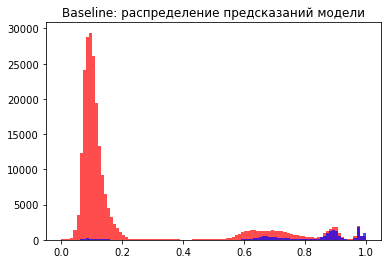

In [65]:
plt.title("Baseline: распределение предсказаний модели")
plt.hist(y_preds_log_reg[~y_test.astype(bool)], bins=100, color='r', alpha=0.7);
plt.hist(y_preds_log_reg[y_test.astype(bool)], bins=100, color='b', alpha=0.7);

In [66]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
def plot_roc_curve(fpr, tpr, model_name="", color=None):
    plt.plot(fpr, tpr, label='%s: ROC curve (area = %0.2f)' %
             (model_name, auc(fpr, tpr)), color=color)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('%s: Receiver operating characteristic curve' % model_name)
    plt.legend(loc="lower right")
    print("Baseline: AUC_ROC = %.3f" % auc(fpr, tpr))


In [67]:
def plot_precision_recall_curve(recall, precision, model_name="", color=None):
    plt.plot(recall, precision, label='%s: Precision-Recall curve (area = %0.2f)' %
             (model_name, auc(recall, precision)), color=color)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("%s: Precision-Recall curve" % model_name)
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.legend(loc="lower left")    
    print("Baseline: AUC_PR = %.3f" % auc(recall, precision))    

Baseline: AUC_ROC = 0.903
Baseline: AUC_PR = 0.417


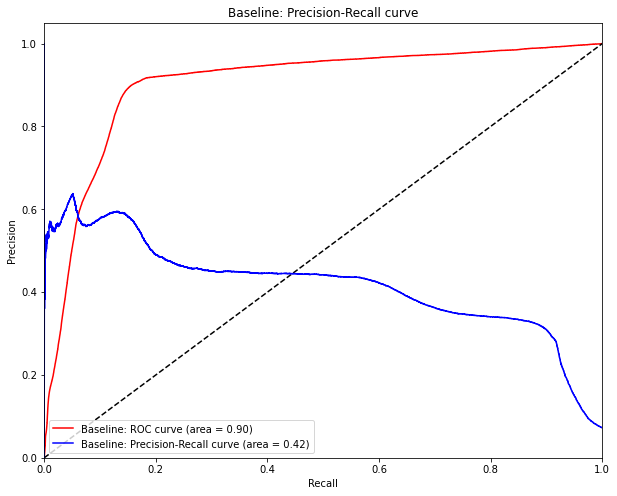

In [68]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_preds_log_reg)
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_preds_log_reg)
plt.figure(figsize=(10, 8))
plot_roc_curve(fpr, tpr, "Baseline", color='r')
plot_precision_recall_curve(recall, precision, "Baseline", color='b')

## LGBMC

In [69]:
%%time
from lightgbm import LGBMClassifier
pipeline_LGBMC = make_pipeline(
    f_prep_pipeline,
    LGBMClassifier(random_state=42)
)
pipeline_LGBMC.fit(X_train, y_train)

Wall time: 11.1 s


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columnselector',
                                  ColumnSelector(columns=['173', '131', '29',
                                                          '38', '40', '82',
                                                          '57', '25', '109',
                                                          '245', '120', '162',
                                                          '209', '158', '159',
                                                          '166', '134', '48',
                                                          '130', '133', '161',
                                                          '3', '21', '15',
                                                          '104', '94', '76',
                                                          '127', '88', '128', ...])),
                                 ('featureunion',
                                  FeatureUnion(transformer_list=[('numeric_features',

In [70]:
#сохранение модели
import dill
with open("LGBMClassifier_pipeline.dill", "wb") as f:
    dill.dump(pipeline_LGBMC, f)

In [71]:
y_preds_LGBMC = pipeline_LGBMC.predict_proba(X_test)[:, 1]
y_preds_LGBMC

array([0.13323138, 0.08508537, 0.10912781, ..., 0.11229159, 0.13651952,
       0.10148493])

In [72]:
#подберем , threshold
for h in range(50,95,1):
    d=classification_report(y_test, y_preds_LGBMC > h/100)
    print('f1-score macro avg', h/100,d.split()[21])

f1-score macro avg 0.5 0.71
f1-score macro avg 0.51 0.71
f1-score macro avg 0.52 0.71
f1-score macro avg 0.53 0.71
f1-score macro avg 0.54 0.71
f1-score macro avg 0.55 0.71
f1-score macro avg 0.56 0.72
f1-score macro avg 0.57 0.72
f1-score macro avg 0.58 0.72
f1-score macro avg 0.59 0.72
f1-score macro avg 0.6 0.72
f1-score macro avg 0.61 0.72
f1-score macro avg 0.62 0.72
f1-score macro avg 0.63 0.72
f1-score macro avg 0.64 0.72
f1-score macro avg 0.65 0.72
f1-score macro avg 0.66 0.72
f1-score macro avg 0.67 0.72
f1-score macro avg 0.68 0.72
f1-score macro avg 0.69 0.73
f1-score macro avg 0.7 0.73
f1-score macro avg 0.71 0.73
f1-score macro avg 0.72 0.74
f1-score macro avg 0.73 0.74
f1-score macro avg 0.74 0.75
f1-score macro avg 0.75 0.75
f1-score macro avg 0.76 0.75
f1-score macro avg 0.77 0.75
f1-score macro avg 0.78 0.75
f1-score macro avg 0.79 0.75
f1-score macro avg 0.8 0.75
f1-score macro avg 0.81 0.75
f1-score macro avg 0.82 0.75
f1-score macro avg 0.83 0.76
f1-score macro avg

In [73]:
metrics_all_.append(evaluate_preds(pipeline_log_reg, X_train, X_test, y_train, y_test, 'lightgbm threshold=0.75', 0.75))

TRAIN

              precision    recall  f1-score   support

         0.0       0.72      0.92      0.81     42130
         1.0       0.89      0.65      0.75     42130

    accuracy                           0.79     84260
   macro avg       0.81      0.79      0.78     84260
weighted avg       0.81      0.79      0.78     84260

TEST

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95    231440
         1.0       0.39      0.65      0.49     18056

    accuracy                           0.90    249496
   macro avg       0.68      0.78      0.72    249496
weighted avg       0.93      0.90      0.91    249496

CONFUSION MATRIX

col_0        0      1
target               
0.0     213273  18167
1.0       6361  11695


In [74]:
metrics_all_.append(evaluate_preds(pipeline_LGBMC, X_train, X_test, y_train, y_test,'lightgbm'))

TRAIN

              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89     42130
         1.0       0.87      0.91      0.89     42130

    accuracy                           0.89     84260
   macro avg       0.89      0.89      0.89     84260
weighted avg       0.89      0.89      0.89     84260

TEST

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93    231440
         1.0       0.35      0.91      0.50     18056

    accuracy                           0.87    249496
   macro avg       0.67      0.89      0.71    249496
weighted avg       0.95      0.87      0.89    249496

CONFUSION MATRIX

col_0      0.0    1.0
target               
0.0     200602  30838
1.0       1626  16430


Baseline: AUC_ROC = 0.929
Baseline: AUC_PR = 0.554


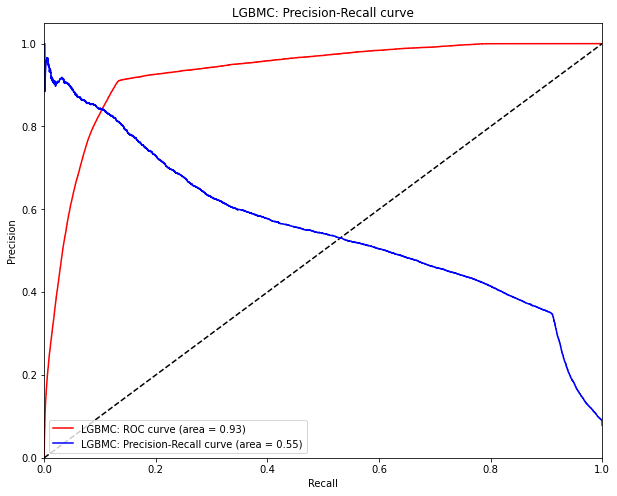

In [75]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_preds_LGBMC)
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_preds_LGBMC)
plt.figure(figsize=(10, 8))
plot_roc_curve(fpr, tpr, "LGBMC", color='r')
plot_precision_recall_curve(recall, precision, "LGBMC", color='b')

## XGBoost

In [76]:
%%time
pipeline_xgb = make_pipeline(
    f_prep_pipeline_no_StandardScaler,
    xgb.XGBClassifier(random_state=21, 
                              n_estimators=100,
                              learning_rate=0.1,
                              max_depth=5,
                              eval_metric='error',
                              use_label_encoder=False)
)

pipeline_xgb.fit(X_train, y_train)
y_predict = pipeline_xgb.predict_proba(X_test)[:, 1]
y_predict

Wall time: 41.8 s


array([0.12670554, 0.10052185, 0.11720501, ..., 0.10493173, 0.13949382,
       0.09319396], dtype=float32)

In [77]:
#подберем , threshold
for h in range(50,95,1):
    d=classification_report(y_test, y_predict > h/100)
    print('f1-score macro avg', h/100,d.split()[21])

f1-score macro avg 0.5 0.71
f1-score macro avg 0.51 0.71
f1-score macro avg 0.52 0.71
f1-score macro avg 0.53 0.71
f1-score macro avg 0.54 0.71
f1-score macro avg 0.55 0.72
f1-score macro avg 0.56 0.72
f1-score macro avg 0.57 0.72
f1-score macro avg 0.58 0.72
f1-score macro avg 0.59 0.72
f1-score macro avg 0.6 0.72
f1-score macro avg 0.61 0.72
f1-score macro avg 0.62 0.72
f1-score macro avg 0.63 0.72
f1-score macro avg 0.64 0.72
f1-score macro avg 0.65 0.72
f1-score macro avg 0.66 0.72
f1-score macro avg 0.67 0.72
f1-score macro avg 0.68 0.72
f1-score macro avg 0.69 0.73
f1-score macro avg 0.7 0.73
f1-score macro avg 0.71 0.73
f1-score macro avg 0.72 0.74
f1-score macro avg 0.73 0.74
f1-score macro avg 0.74 0.75
f1-score macro avg 0.75 0.75
f1-score macro avg 0.76 0.75
f1-score macro avg 0.77 0.75
f1-score macro avg 0.78 0.75
f1-score macro avg 0.79 0.75
f1-score macro avg 0.8 0.75
f1-score macro avg 0.81 0.75
f1-score macro avg 0.82 0.76
f1-score macro avg 0.83 0.76
f1-score macro avg

In [78]:
metrics_all_.append(evaluate_preds(pipeline_xgb, X_train, X_test, y_train, y_test,'XGBoost=0,85',0.85))

TRAIN

              precision    recall  f1-score   support

         0.0       0.74      0.95      0.83     42130
         1.0       0.93      0.66      0.78     42130

    accuracy                           0.81     84260
   macro avg       0.84      0.81      0.80     84260
weighted avg       0.84      0.81      0.80     84260

TEST

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96    231440
         1.0       0.48      0.65      0.55     18056

    accuracy                           0.92    249496
   macro avg       0.73      0.80      0.76    249496
weighted avg       0.94      0.92      0.93    249496

CONFUSION MATRIX

col_0        0      1
target               
0.0     218862  12578
1.0       6308  11748


In [79]:
metrics_all_.append(evaluate_preds(pipeline_xgb, X_train, X_test, y_train, y_test,'XGBoost'))

TRAIN

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88     42130
         1.0       0.87      0.91      0.89     42130

    accuracy                           0.89     84260
   macro avg       0.89      0.89      0.89     84260
weighted avg       0.89      0.89      0.89     84260

TEST

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93    231440
         1.0       0.35      0.91      0.50     18056

    accuracy                           0.87    249496
   macro avg       0.67      0.89      0.71    249496
weighted avg       0.95      0.87      0.89    249496

CONFUSION MATRIX

col_0        0      1
target               
0.0     200571  30869
1.0       1625  16431


Baseline: AUC_ROC = 0.929
Baseline: AUC_PR = 0.555


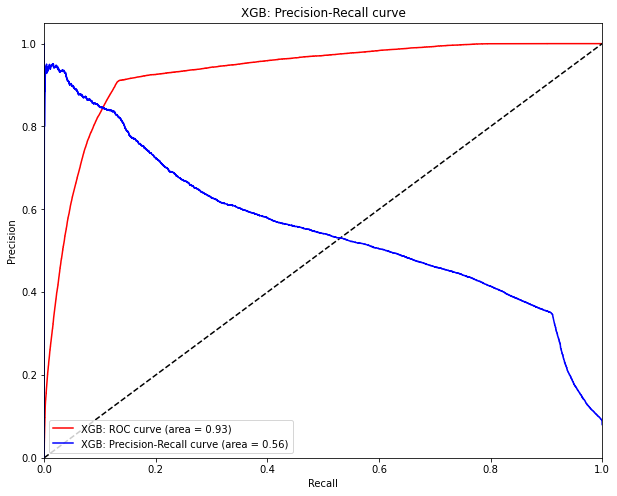

In [80]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_predict)
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_predict)
plt.figure(figsize=(10, 8))
plot_roc_curve(fpr, tpr, "XGB", color='r')
plot_precision_recall_curve(recall, precision, "XGB", color='b')

XGBoost / GridSearchCV

In [81]:
# Parameter Tuning
model_xgb_GS = xgb.XGBClassifier()
param_dist = {"max_depth": [5,10,20],
              #"min_child_weight" : [1,3,6],
              "n_estimators": [100, 150, 200],
              "learning_rate": [0.05, 0.1,0.16],
              "eval_metric": ['error'],
              }
grid_search = GridSearchCV(model_xgb_GS, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1)

In [82]:
%%time
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Wall time: 1h 56min 43s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [83]:
y_predict_gs = grid_search.predict_proba(X_test)[:, 1]
y_predict_gs

array([0.13124557, 0.09131913, 0.1200219 , ..., 0.09375343, 0.14278656,
       0.13111465], dtype=float32)

In [84]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Baseline: AUC_ROC = 0.929
Baseline: AUC_PR = 0.557


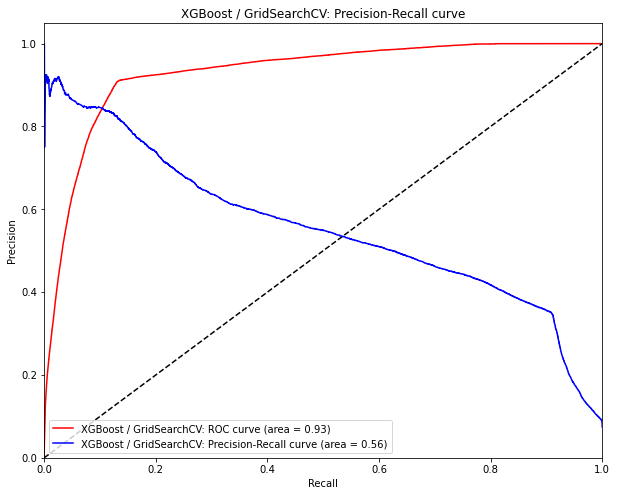

In [85]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_predict_gs)
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_predict_gs)
plt.figure(figsize=(10, 8))
plot_roc_curve(fpr, tpr, "XGBoost / GridSearchCV", color='r')
plot_precision_recall_curve(recall, precision, "XGBoost / GridSearchCV", color='b')

### ДЕРЕВО РЕШЕНИЙ

In [86]:
model_DecisionTree = DecisionTreeClassifier(random_state=21,
                                    criterion='gini',
#                                    class_weight={0:1, 1:disbalance},
                                    min_impurity_decrease=5,
                                    min_samples_split=10,
                                    min_samples_leaf=10,
                                    max_depth=5
                                    )
model_DecisionTree

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=5,
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=21)

In [87]:
pipeline_DecisionTree = make_pipeline(
    f_prep_pipeline,
    model_DecisionTree
)
pipeline_DecisionTree.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columnselector',
                                  ColumnSelector(columns=['173', '131', '29',
                                                          '38', '40', '82',
                                                          '57', '25', '109',
                                                          '245', '120', '162',
                                                          '209', '158', '159',
                                                          '166', '134', '48',
                                                          '130', '133', '161',
                                                          '3', '21', '15',
                                                          '104', '94', '76',
                                                          '127', '88', '128', ...])),
                                 ('featureunion',
                                  FeatureUnion(transformer_list=[('numeric_features',

In [88]:
y_preds_DecisionTree = pipeline_DecisionTree.predict_proba(X_test)[:, 1]
y_preds_DecisionTree

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

In [89]:
metrics_all_.append(evaluate_preds(pipeline_DecisionTree, X_train, X_test, y_train, y_test,'DecisionTree'))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRAIN

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     42130
         1.0       0.00      0.00      0.00     42130

    accuracy                           0.50     84260
   macro avg       0.25      0.50      0.33     84260
weighted avg       0.25      0.50      0.33     84260



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TEST

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96    231440
         1.0       0.00      0.00      0.00     18056

    accuracy                           0.93    249496
   macro avg       0.46      0.50      0.48    249496
weighted avg       0.86      0.93      0.89    249496

CONFUSION MATRIX

col_0      0.0
target        
0.0     231440
1.0      18056


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-56-f689ed7082e6>:20: RuntimeWarning: invalid value encountered in longlong_scalars
  metrics['Precision'] = PrecisionTrue = TP/(TP+FP)


Baseline: AUC_ROC = 0.500
Baseline: AUC_PR = 0.536


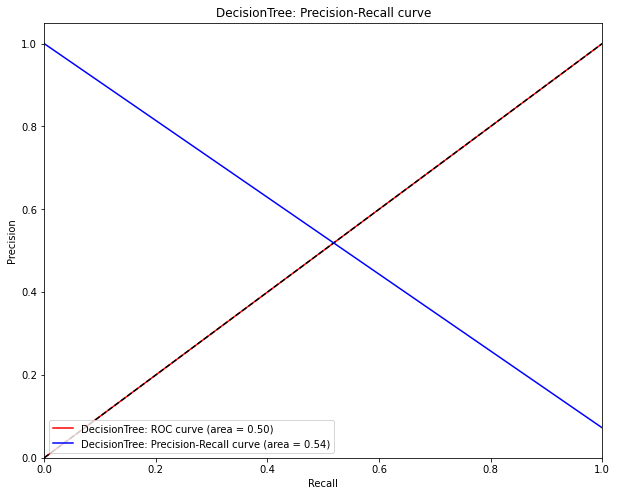

In [90]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_preds_DecisionTree)
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_preds_DecisionTree)
plt.figure(figsize=(10, 8))
plot_roc_curve(fpr, tpr, "DecisionTree", color='r')
plot_precision_recall_curve(recall, precision, "DecisionTree", color='b')

### GradientBoosting

In [91]:
model_GradientBoosting = GradientBoostingClassifier(random_state=21,                                                                        
                                    max_depth=3,
                                    min_impurity_decrease=5,
                                    min_samples_split=10,
                                    min_samples_leaf=10                                   
                                    )
model_GradientBoosting

GradientBoostingClassifier(min_impurity_decrease=5, min_samples_leaf=10,
                           min_samples_split=10, random_state=21)

In [92]:
%%time
pipeline_GradientBoosting = make_pipeline(
    f_prep_pipeline,
    model_GradientBoosting
)
pipeline_GradientBoosting.fit(X_train, y_train)

Wall time: 3min 36s


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columnselector',
                                  ColumnSelector(columns=['173', '131', '29',
                                                          '38', '40', '82',
                                                          '57', '25', '109',
                                                          '245', '120', '162',
                                                          '209', '158', '159',
                                                          '166', '134', '48',
                                                          '130', '133', '161',
                                                          '3', '21', '15',
                                                          '104', '94', '76',
                                                          '127', '88', '128', ...])),
                                 ('featureunion',
                                  FeatureUnion(transformer_list=[('numeric_features',

In [93]:
y_preds_GradientBoosting = pipeline_GradientBoosting.predict_proba(X_test)[:, 1]
y_preds_GradientBoosting

array([0.12080518, 0.11282042, 0.12080518, ..., 0.11282042, 0.12109297,
       0.12109297])

In [94]:
#подберем , threshold
for h in range(50,95,1):
    d=classification_report(y_test, y_preds_GradientBoosting > h/100)
    print('f1-score macro avg', h/100,d.split()[21])

f1-score macro avg 0.5 0.71
f1-score macro avg 0.51 0.71
f1-score macro avg 0.52 0.71
f1-score macro avg 0.53 0.71
f1-score macro avg 0.54 0.71
f1-score macro avg 0.55 0.71
f1-score macro avg 0.56 0.71
f1-score macro avg 0.57 0.71
f1-score macro avg 0.58 0.71
f1-score macro avg 0.59 0.71
f1-score macro avg 0.6 0.71
f1-score macro avg 0.61 0.71
f1-score macro avg 0.62 0.71
f1-score macro avg 0.63 0.71
f1-score macro avg 0.64 0.71
f1-score macro avg 0.65 0.71
f1-score macro avg 0.66 0.71
f1-score macro avg 0.67 0.71
f1-score macro avg 0.68 0.71
f1-score macro avg 0.69 0.71
f1-score macro avg 0.7 0.72
f1-score macro avg 0.71 0.72
f1-score macro avg 0.72 0.74
f1-score macro avg 0.73 0.74
f1-score macro avg 0.74 0.75
f1-score macro avg 0.75 0.75
f1-score macro avg 0.76 0.75
f1-score macro avg 0.77 0.75
f1-score macro avg 0.78 0.75
f1-score macro avg 0.79 0.75
f1-score macro avg 0.8 0.75
f1-score macro avg 0.81 0.75
f1-score macro avg 0.82 0.76
f1-score macro avg 0.83 0.76
f1-score macro avg

In [95]:
metrics_all_.append(evaluate_preds(pipeline_GradientBoosting, X_train, X_test, y_train, y_test,'GradientBoosting=0,83',0.83))

TRAIN

              precision    recall  f1-score   support

         0.0       0.72      0.95      0.82     42130
         1.0       0.93      0.62      0.74     42130

    accuracy                           0.79     84260
   macro avg       0.82      0.79      0.78     84260
weighted avg       0.82      0.79      0.78     84260

TEST

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96    231440
         1.0       0.50      0.62      0.55     18056

    accuracy                           0.93    249496
   macro avg       0.74      0.79      0.76    249496
weighted avg       0.94      0.93      0.93    249496

CONFUSION MATRIX

col_0        0      1
target               
0.0     220284  11156
1.0       6866  11190


In [96]:
metrics_all_.append(evaluate_preds(pipeline_GradientBoosting, X_train, X_test, y_train, y_test,'GradientBoosting'))

TRAIN

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88     42130
         1.0       0.87      0.91      0.89     42130

    accuracy                           0.89     84260
   macro avg       0.89      0.89      0.89     84260
weighted avg       0.89      0.89      0.89     84260

TEST

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.92    231440
         1.0       0.35      0.91      0.50     18056

    accuracy                           0.87    249496
   macro avg       0.67      0.89      0.71    249496
weighted avg       0.95      0.87      0.89    249496

CONFUSION MATRIX

col_0      0.0    1.0
target               
0.0     200460  30980
1.0       1618  16438


Baseline: AUC_ROC = 0.927
Baseline: AUC_PR = 0.550


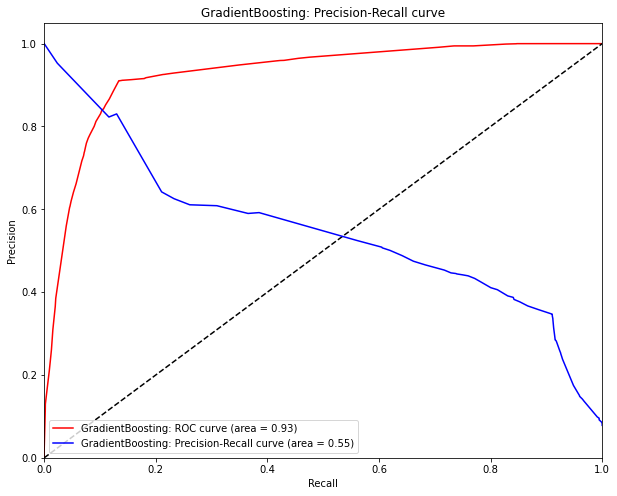

In [97]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_preds_GradientBoosting)
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_preds_GradientBoosting)
plt.figure(figsize=(10, 8))
plot_roc_curve(fpr, tpr, "GradientBoosting", color='r')
plot_precision_recall_curve(recall, precision, "GradientBoosting", color='b')

### CatBoost

In [98]:
frozen_params = {
    'silent':True, 
    "random_state":21,    
#    'class_weights':[1, disbalance],
    'allow_writing_files':False,
    'learning_rate':0.2,        
    'eval_metric':'F1',
    'early_stopping_rounds':30,
    'custom_metric':['Precision', 'Recall'],
    'subsample':0.8,
}

In [99]:
%%time
model_catb = catb.CatBoostClassifier(**frozen_params, 
                                     iterations=300, 
                                     max_depth=3,
                                     #n_estimators=95,
                                     reg_lambda=0.6,
                                    )



Wall time: 7.99 ms


In [100]:
%%time
pipeline_catb = make_pipeline(
    f_prep_pipeline,
    model_catb
)
pipeline_catb.fit(X_train, y_train)

Wall time: 18.9 s


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columnselector',
                                  ColumnSelector(columns=['173', '131', '29',
                                                          '38', '40', '82',
                                                          '57', '25', '109',
                                                          '245', '120', '162',
                                                          '209', '158', '159',
                                                          '166', '134', '48',
                                                          '130', '133', '161',
                                                          '3', '21', '15',
                                                          '104', '94', '76',
                                                          '127', '88', '128', ...])),
                                 ('featureunion',
                                  FeatureUnion(transformer_list=[('numeric_features',

In [101]:
y_preds_catb = pipeline_catb.predict_proba(X_test)[:, 1]
y_preds_catb

array([0.13506206, 0.08307714, 0.0916823 , ..., 0.08632312, 0.1325562 ,
       0.0845278 ])

In [102]:
#подберем , threshold
for h in range(50,95,1):
    d=classification_report(y_test, y_preds_catb > h/100)
    print('f1-score macro avg', h/100,d.split()[21])

f1-score macro avg 0.5 0.71
f1-score macro avg 0.51 0.71
f1-score macro avg 0.52 0.71
f1-score macro avg 0.53 0.71
f1-score macro avg 0.54 0.71
f1-score macro avg 0.55 0.71
f1-score macro avg 0.56 0.71
f1-score macro avg 0.57 0.71
f1-score macro avg 0.58 0.71
f1-score macro avg 0.59 0.71
f1-score macro avg 0.6 0.71
f1-score macro avg 0.61 0.71
f1-score macro avg 0.62 0.71
f1-score macro avg 0.63 0.72
f1-score macro avg 0.64 0.72
f1-score macro avg 0.65 0.72
f1-score macro avg 0.66 0.72
f1-score macro avg 0.67 0.72
f1-score macro avg 0.68 0.72
f1-score macro avg 0.69 0.72
f1-score macro avg 0.7 0.73
f1-score macro avg 0.71 0.73
f1-score macro avg 0.72 0.73
f1-score macro avg 0.73 0.74
f1-score macro avg 0.74 0.74
f1-score macro avg 0.75 0.74
f1-score macro avg 0.76 0.75
f1-score macro avg 0.77 0.75
f1-score macro avg 0.78 0.75
f1-score macro avg 0.79 0.75
f1-score macro avg 0.8 0.75
f1-score macro avg 0.81 0.76
f1-score macro avg 0.82 0.76
f1-score macro avg 0.83 0.76
f1-score macro avg

In [103]:
metrics_all_.append(evaluate_preds(pipeline_catb, X_train, X_test, y_train, y_test,'CatBoost=0,83',0.83))

TRAIN

              precision    recall  f1-score   support

         0.0       0.75      0.95      0.84     42130
         1.0       0.93      0.68      0.78     42130

    accuracy                           0.81     84260
   macro avg       0.84      0.81      0.81     84260
weighted avg       0.84      0.81      0.81     84260

TEST

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96    231440
         1.0       0.47      0.67      0.56     18056

    accuracy                           0.92    249496
   macro avg       0.72      0.81      0.76    249496
weighted avg       0.94      0.92      0.93    249496

CONFUSION MATRIX

col_0        0      1
target               
0.0     218004  13436
1.0       5959  12097


In [104]:
metrics_all_.append(evaluate_preds(pipeline_catb, X_train, X_test, y_train, y_test,'CatBoost'))

TRAIN

              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89     42130
         1.0       0.87      0.91      0.89     42130

    accuracy                           0.89     84260
   macro avg       0.89      0.89      0.89     84260
weighted avg       0.89      0.89      0.89     84260

TEST

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.92    231440
         1.0       0.35      0.91      0.50     18056

    accuracy                           0.87    249496
   macro avg       0.67      0.89      0.71    249496
weighted avg       0.95      0.87      0.89    249496

CONFUSION MATRIX

col_0      0.0    1.0
target               
0.0     200472  30968
1.0       1627  16429


Baseline: AUC_ROC = 0.928
Baseline: AUC_PR = 0.547


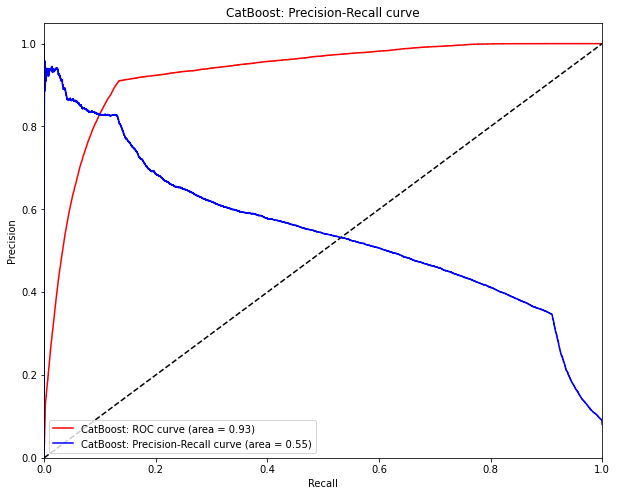

In [105]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_preds_catb)
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_preds_catb)
plt.figure(figsize=(10, 8))
plot_roc_curve(fpr, tpr, "CatBoost", color='r')
plot_precision_recall_curve(recall, precision, "CatBoost", color='b')

In [106]:
#соберем все результаты в ону таблицу и проведем анализ
pd.DataFrame(metrics_all_)

,Model,TN,FN,TP,FP,F-Score-macro,Precision,Recall,F-Score,roc_auc_score_test,accuracy
0,logreg,190422,1550,16506,41018,0.668123,0.286941,0.914156,0.436782,0.868463,0.829384
1,logreg threshold=0.8,216519,7193,10863,14921,0.723494,0.421308,0.601628,0.495575,0.768579,0.911365
2,lightgbm threshold=0.75,213273,6361,11695,18167,0.716874,0.391635,0.647707,0.488126,0.784606,0.901690
3,lightgbm,200602,1626,16430,30838,0.714086,0.347592,0.909947,0.503031,0.888351,0.869882
4,"XGBoost=0,85",218862,6308,11748,12578,0.756512,0.482940,0.650642,0.554386,0.798148,0.924303
5,XGBoost,200571,1625,16431,30869,0.713941,0.347378,0.910002,0.502815,0.888312,0.869761
6,DecisionTree,231440,18056,0,0,0.481228,NaN,0.000000,NaN,0.500000,0.927630
7,"GradientBoosting=0,83",220284,6866,11190,11156,0.757317,0.500761,0.619739,0.553933,0.785768,0.927766
8,GradientBoosting,200460,1618,16438,30980,0.713464,0.346662,0.910390,0.502123,0.888266,0.869345
9,"CatBoost=0,83",218004,5959,12097,13436,0.756230,0.473779,0.669971,0.555048,0.805959,0.922263


### Финальная модель
после анализа полученных результатов в таблице, выбираем в качестве финальной модели XGBoost с threshold=0,85

In [107]:
#проведем обучение выбранной модели
final_model = pipeline_xgb

final_model.fit(X_train, y_train)
y_predict_proba = final_model.predict_proba(X_test)[:, 1]
y_predict = (y_predict_proba >= 0.85).astype(int)
y_predict


array([0, 0, 0, ..., 0, 0, 0])

In [108]:
evaluate_preds(final_model, X_train, X_test, y_train, y_test,'final model')

TRAIN

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88     42130
         1.0       0.87      0.91      0.89     42130

    accuracy                           0.89     84260
   macro avg       0.89      0.89      0.89     84260
weighted avg       0.89      0.89      0.89     84260

TEST

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93    231440
         1.0       0.35      0.91      0.50     18056

    accuracy                           0.87    249496
   macro avg       0.67      0.89      0.71    249496
weighted avg       0.95      0.87      0.89    249496

CONFUSION MATRIX

col_0        0      1
target               
0.0     200571  30869
1.0       1625  16431


{'Model': 'final model',
 'TN': 200571,
 'FN': 1625,
 'TP': 16431,
 'FP': 30869,
 'F-Score-macro': 0.713940767159241,
 'Precision': 0.3473784355179704,
 'Recall': 0.9100022153300842,
 'F-Score': 0.5028153497766081,
 'roc_auc_score_test': 0.8883121169979146,
 'accuracy': 0.8697614390611472}

In [109]:
feature_importances = pd.DataFrame(zip(X_train.columns, 
                                       final_model[1].feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)
feature_importances

,feature_name,importance
251,65,0.339387
33,day,0.018254
92,179,0.010728
250,71,0.003137
52,26,0.002011
...,...,...
118,10,0.000000
120,186,0.000000
197,123,0.000000
196,248,0.000000


In [110]:
feature_importances.shape

(252, 2)

In [147]:
MODEL_FILE_PATH = './model.pkl'

In [148]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(final_model, file)

In [149]:
with open(MODEL_FILE_PATH, 'rb') as file:
    my_model = pickle.load(file)
    
my_model

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columnselector',
                                  ColumnSelector(columns=['173', '131', '29',
                                                          '38', '40', '82',
                                                          '57', '25', '109',
                                                          '245', '120', '162',
                                                          '209', '158', '159',
                                                          '166', '134', '48',
                                                          '130', '133', '161',
                                                          '3', '21', '15',
                                                          '104', '94', '76',
                                                          '127', '88', '128', ...])),
                                 ('featureunion',
                                  FeatureUnion(transformer_list=[('numeric_features',

In [150]:
test_df = pd.read_pickle(DATA_TEST_FEATURES_PATH_pkl)

In [151]:
y_predict_proba = my_model.predict_proba(test_df)[:, 1]
#y_predict = (y_predict_proba >= 0.85).astype(int)
y_predict_proba

array([0.10691968, 0.6920876 , 0.10774732, ..., 0.14666   , 0.1114723 ,
       0.13766597], dtype=float32)

In [152]:
answers_test = test_df
answers_test['target']=y_predict_proba

In [153]:
answers_test.shape

(71231, 261)

In [154]:
answers_test

,id,vas_id,buy_time,date,week_on_month,day,month,0,1,2,...,244,245,246,247,248,249,250,251,252,target
0,55,2.0,1547413200,1970-01-01 00:00:01.547413200,1,1,1,-96.799971,-166.599112,-110.740786,...,-610.770792,-24.996269,-34.630448,-253.747724,-22.832889,-0.694428,-12.175933,-0.45614,1.0,0.106920
1,64,4.0,1548018000,1970-01-01 00:00:01.548018000,1,1,1,-96.799971,-407.009112,-110.740786,...,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0,0.692088
2,151,2.0,1547413200,1970-01-01 00:00:01.547413200,1,1,1,-20.989971,-147.029112,-34.930786,...,-605.770792,-13.996269,-37.630448,-158.747724,109.167111,-0.694428,-12.175933,-0.45614,0.0,0.107747
3,274,2.0,1547413200,1970-01-01 00:00:01.547413200,1,1,1,-20.989971,-116.859112,-34.930786,...,-613.770792,-24.996269,-24.630448,-213.747724,-21.832889,-0.694428,-12.175933,-0.45614,0.0,0.124278
4,274,4.0,1548018000,1970-01-01 00:00:01.548018000,1,1,1,265.700029,-43.599112,251.759214,...,-534.770792,-24.996269,-37.630448,-96.747724,-24.832889,-0.694428,-12.175933,0.54386,0.0,0.726885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71226,4362676,2.0,1548018000,1970-01-01 00:00:01.548018000,1,1,1,-96.799971,-408.179112,-110.740786,...,-606.770792,-25.996269,-7.630448,-216.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0,0.120113
71227,4362677,2.0,1547413200,1970-01-01 00:00:01.547413200,1,1,1,231.200029,13.590888,217.259214,...,-613.770792,-25.996269,0.369552,-275.747724,-22.832889,-0.694428,-12.175933,-0.45614,1.0,0.121322
71228,4362697,5.0,1546808400,1970-01-01 00:00:01.546808400,1,1,1,226.300029,67.990888,212.359214,...,-18.770792,-24.996269,-37.630448,-126.747724,-20.832889,-0.694428,-12.175933,-0.45614,0.0,0.146660
71229,4362712,5.0,1547413200,1970-01-01 00:00:01.547413200,1,1,1,-71.299971,214.700888,-46.900786,...,-567.770792,-24.996269,-37.630448,-255.747724,-6.832889,-0.694428,-12.175933,-0.45614,0.0,0.111472


In [155]:
col = ['id', 'vas_id', 'buy_time', 'target']
answers_test = answers_test[col]
answers_test

,id,vas_id,buy_time,target
0,55,2.0,1547413200,0.106920
1,64,4.0,1548018000,0.692088
2,151,2.0,1547413200,0.107747
3,274,2.0,1547413200,0.124278
4,274,4.0,1548018000,0.726885
...,...,...,...,...
71226,4362676,2.0,1548018000,0.120113
71227,4362677,2.0,1547413200,0.121322
71228,4362697,5.0,1546808400,0.146660
71229,4362712,5.0,1547413200,0.111472


In [156]:
answers_test.to_csv('./answer_test.csv')

In [157]:
import sklearn
print(sklearn.__version__)

0.24.2


In [158]:
pip freeze

-cikit-learn @ file:///C:/ci/scikit-learn_1592853510272/work
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
argh==0.26.2
asn1crypto==1.3.0
astroid @ file:///C:/ci/astroid_1592487315634/work
astropy==4.0.1.post1
atomicwrites==1.4.0
attrs==19.3.0
autopep8 @ file:///tmp/build/80754af9/autopep8_1592412889138/work
Babel==2.8.0
backcall==0.2.0
backports.functools-lru-cache @ file:///tmp/build/80754af9/backports.functools_lru_cache_1618170165463/work
backports.shutil-get-terminal-size==1.0.0
backports.tempfile @ file:///home/linux1/recipes/ci/backports.tempfile_1610991236607/work
backports.weakref==1.0.post1
bcrypt==3.1.7
beautifulsoup4==4.9.1
bitarray @ file:///C:/ci/bitarray_1594751093906/work
bkcharts==0.2
bleach==3.1.5
bokeh @ file:///C:/ci/bokeh_1593178781838/work
boto==2.49.0
Bottleneck==1.3.2
brotlipy==0.7.0
bs4==0.0.1
catboost @ https://pypi.org/packages/cp38/c/catboost/catboost-0.26.1-cp38-none-win_amd64.whl
certifi==2020.6.20
cffi==1.14.0

itsdangerous==1.1.0
jdcal==1.4.1
jedi @ file:///C:/ci/jedi_1592833825077/work
Jinja2==2.11.2
joblib @ file:///tmp/build/80754af9/joblib_1594236160679/work
json5==0.9.5
jsonschema==3.2.0
jupyter==1.0.0
jupyter-client @ file:///tmp/build/80754af9/jupyter_client_1594826976318/work
jupyter-console==6.1.0
jupyter-contrib-core==0.3.3
jupyter-contrib-nbextensions==0.5.1
jupyter-core==4.6.3
jupyter-highlight-selected-word==0.2.0
jupyter-latex-envs==1.4.6
jupyter-nbextensions-configurator==0.4.1
jupyterlab==2.1.5
jupyterlab-server @ file:///tmp/build/80754af9/jupyterlab_server_1594164409481/work
keyring @ file:///C:/ci/keyring_1593109799227/work
kiwisolver==1.2.0
lazy-object-proxy==1.4.3
libarchive-c==2.9
lightgbm @ file:///D:/bld/lightgbm_1618922759859/work
llvmlite==0.33.0+1.g022ab0f
locket==0.2.0
lxml @ file:///C:/ci/lxml_1594822774489/work
MarkupSafe==1.1.1
matplotlib @ file:///C:/ci/matplotlib-base_1592837548929/work
mccabe==0.6.1
menuinst==1.4.16
mistune==0.8.4
mkl-fft==1.1.0
mkl-random==